## Analysis of Questionnaire Data and Merging with Behavioural DataFrames

1. Importation of Libraries
2. Reading in the data_sv_modeling_Coll.csv file which contains various mathematical estimates of subjective value - bayesian code
3. Reading in the bahvioural_sv_cleaned.csv file which contains the overall value and absolute value conditions and the estimates of subjective value - frequentist code
4. Filter the DataFrame to only keep participants who did not accept money on >= 95% of the trials
5. Translate the questionnaire column-headers into English using GoolgeTranslator
6. convert the participants_new.tsv that contains SAI,TAI and pcs scales into csv
7. Reverse code the selected SAI,TAI columns 
8. Sum the column values to get the scores for SAI, TAI and PCS
9. Heatmap for SAI, TAI, PCS
10. Concatenate the 3 DataFrames (score_data (SAI, TAI, PCS), model_data (fitted sv_pain values), large behavioural DataFrame
11. correlating some potential predictors of regression models for the bayesian analysis - heatmap corr.plot

12. DataFrames:
- behavioural_sv_cleaned_final_2.csv
- data_sv_modeling_Coll.csv
- behavioural_sv_cleaned_2.csv
- participants_STAI_PCS_Rev.csv
- participants_new.csv
- participants_new.tsv
- data_sv_modeling_Coll.csv
- Quest_sv_pain_Corr.png


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator


In [ ]:
# loading the sv_modeling_Coll.csv file which contains bayesian estimates of subjective value functions 
data_sv_coll = pd.read_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/data_sv_modeling_Coll.csv')
#reading in the data file that contains the old sv_estimates (frequentist statistics) and the ov - and abs-money conditions
data_old = pd.read_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/behavioural_sv_cleaned.csv')
num_participants_sv_coll = data_sv_coll['participant'].nunique()
num_participants_old = data_old['participant'].nunique()

print("participants in data_sv_coll:", num_participants_sv_coll)
print("participants in data_old:", num_participants_old)
unique_participants_sv_coll = data_sv_coll['participant'].unique()
unique_participants_old = data_old['participant'].unique()
print(unique_participants_old)
print(unique_participants_sv_coll)

# we keep these participants that had an acceptance threshold of <=95% (the amount of times money was chosen and the pain_level accepted)
participants_keep = ['sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010',
                        'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017',
                        'sub-019', 'sub-020', 'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-026',
                        'sub-027', 'sub-029', 'sub-030', 'sub-032', 'sub-033', 'sub-034', 'sub-035',
                        'sub-037', 'sub-038', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045',
                        'sub-047', 'sub-048', 'sub-050']

# Filter the behavioural data to keep only these participants
filtered_data_old = data_old[data_old['participant'].isin(participants_keep)]
filtered_data_old.to_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/behavioural_sv_cleaned_2.csv')
filtered_data_old
data = pd.read_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/behavioural_sv_cleaned_2.csv')

In [ ]:
data_in = r'D:\Aberdeen_Uni_June24\MPColl_Lab\All_Files_Relevant_For_Git\Quest_Code\Quest_Data\participants_new.tsv'
data_out = r'D:\Aberdeen_Uni_June24\MPColl_Lab\All_Files_Relevant_For_Git\Quest_Code\Quest_Data\participants_new.csv'
data = pd.read_csv(data_in, sep='\t')
# headers
headers = [
    "participant_id", "age", "sex", "gender", "handedness", "test_date", "additional_reward",
    "p1", "p2", "p3", "p4", "p5", "comments", "is_man", "qsocio_Timestamp", "qsocio_#Participant",
    "qsocio_Date", "qsocio_Quel est votre âge en années ?", "qsocio_Quel sexe vous a été assigné à la naissance ?",
    "qsocio_Quel est votre genre ?", "qsocio_À quelle ethnicité vous identifiez-vous (cochez tout ce qui s'applique) ?",
    "qsocio_Quel est le plus haut diplôme que vous avez obtenu (ou équivalent) ?",
    "qsocio_Quel est votre statut d'emploi (Cochez tout ce qui s'applique) ?", "qiastay2_Je me sens bien",
    "qiastay2_Je me sens nerveux(se) et agité(e)", "qiastay2_Je me sens content(e) de moi-même",
    "qiastay2_Je voudrais être aussi heureux(se) que les autres semblent l'être", "qiastay2_J'ai l'impression d'être un(e) raté(e)",
    "qiastay2_Je me sens reposé(e)", "qiastay2_Je suis d'un grand calme",
    "qiastay2_Je sens que les difficultés s'accumulent au point où je n'arrive pas à les surmonter",
    "qiastay2_Je m'en fais trop pour des choses qui n'en valent pas vraiment la peine", "qiastay2_Je suis heureux(se)",
    "qiastay2_J'ai des pensées troublantes", "qiastay2_Je manque de confiance en moi", "qiastay2_Je me sens en sécurité",
    "qiastay2_Prendre des décisions m'est facile", "qiastay2_Je sens que je ne suis pas à la hauteur de la situation",
    "qiastay2_Je suis satisfait(e)", "qiastay2_Des idées sans importance me passent par la tête et me tracassent",
    "qiastay2_Je prends les déceptions tellement à cœur que je n'arrive pas à les chasser de mon esprit",
    "qiastay2_Je suis une personne qui a les nerfs solides",
    "qiastay2_Je deviens tendu(e) ou bouleversé(e) quand je songe à mes préoccupations et à mes intérêts récents",
    "qiastay1_Je me sens calme", "qiastay1_Je me sens en sécurité", "qiastay1_Je suis tendu(e)",
    "qiastay1_Je me sens surmené(e)", "qiastay1_ Je me sens tranquille", "qiastay1_Je me sens bouleversé(e)",
    "qiastay1_Je suis préoccupé(e) actuellement par des malheurs possibles", "qiastay1_ Je me sens comblé(e)",
    "qiastay1_Je me sens effrayé(e)", "qiastay1_Je me sens à l'aise", "qiastay1_Je me sens sûr(e) de moi",
    "qiastay1_Je me sens nerveux(se)", "qiastay1_Je suis affolé(e)", "qiastay1_Je me sens indécis(e)",
    "qiastay1_Je suis détendu(e)", "qiastay1_Je me sens satisfait(e)", "qiastay1_Je suis préoccupé(e)",
    "qiastay1_Je me sens tout mêlé(e)", "qiastay1_Je sens que j'ai les nerfs solides", "qiastay1_Je me sens bien",
    "qpcs_Quand j'ai de la douleur... J'ai peur qu'il n'y aura pas de fin à la douleur.",
    "qpcs_Quand j'ai de la douleur... Je sens que je ne peux pas continuer.",
    "qpcs_Quand j'ai de la douleur... C'est terrible et je pense que ça ne s'améliorera jamais.",
    "qpcs_Quand j'ai de la douleur... C'est affreux et je sens que c'est plus fort que moi.",
    "qpcs_Quand j'ai de la douleur... Je sens que je ne peux plus supporter la douleur.",
    "qpcs_Quand j'ai de la douleur... J'ai peur que la douleur s'empire.",
    "qpcs_Quand j'ai de la douleur... Je ne fais que penser à d'autres expériences douloureuses.",
    "qpcs_Quand j'ai de la douleur... Avec inquiétude, je souhaite que la douleur disparaisse.",
    "qpcs_Quand j'ai de la douleur... Je ne peux m'empêcher d'y penser.",
    "qpcs_Quand j'ai de la douleur... Je ne fais que penser à quel point ça fait mal.",
    "qpcs_Quand j'ai de la douleur... Je ne fais que penser à quel point je veux que la douleur disparaisse.",
    "qpcs_Quand j'ai de la douleur... Il n'y a rien que je puisse faire pour réduire l'intensité de la douleur.",
    "qpcs_Quand j'ai de la douleur... Je me demande si quelque chose de grave va se produire."
]

# Initialize the Google Translator
translator = GoogleTranslator(source='fr', target='en')

# translate column names
# strip whitespace
# Use Google Translator to translate the column name 

def translate_column_name(column_name):
    column_name = column_name.strip()
    translated = translator.translate(column_name)
    return translated

translated_columns = [translate_column_name(col) for col in data.columns]

# for col in data.columns:
#    translated_columns = translate_column_name(col)
#    return translated_columns

data.columns = translated_columns
data.to_csv(data_out, index=False)


# heatmap of ungrouped data

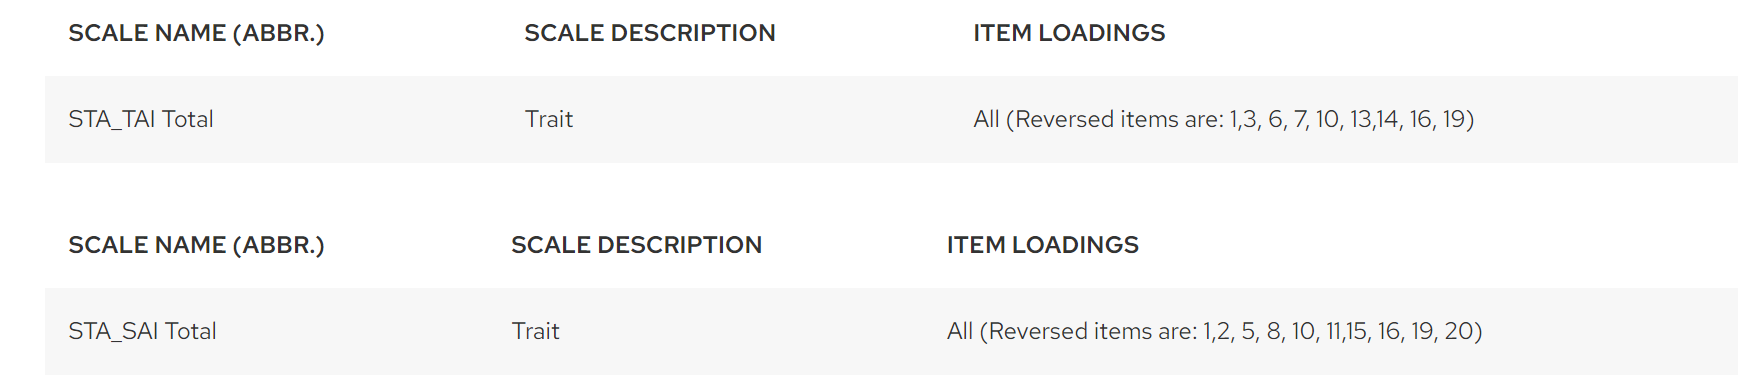

# Reverse-scoring of STAI scales

In [ ]:
STA_TAI_En = [           
             1 'qiastay2_I feel good'
             2 'qiastay2_I feel nervous and agitated'	
             3 'qiastay2_I feel happy with myself'	
             4 'qiastay2_I would like to be as happy as others seem to be',
             5 'qiastay2_I feel like a failure',
             6 'qiastay2_I feel rested',
             7 'qiastay2_I am very calm',
             8 'qiastay2_I feel that the difficulties are piling up to the point where I cannot overcome them',
             9 "qiastay2_I worry too much about things that aren't really worth it",
             10 'qiastay2_I am happy',
             11 'qiastay2_I have disturbing thoughts',
             12 'qiastay2_I lack self-confidence',
             13 'qiastay2_I feel safe',
             14 'qiastay2_Making decisions is easy for me',
             15 'qiastay2_I feel that I am not up to the situation',
             16 'qiastay2_I am satisfied',
             17 'qiastay2_Unimportant thoughts run through my head and bother me',
             18 "qiastay2_I take disappointments so seriously that I can't get them out of my mind",
             19 "qiastay2_I am a person who has strong nerves",
             20 "qiastay2_I become tense or upset when I think about my recent concerns and interests"]

Foreward_TAI = ["qiastay2_I feel nervous and agitated",
                "qiastay2_I would like to be as happy as others seem to be",
                "qiastay2_I feel like a failure",
                "qiastay2_I feel that the difficulties are piling up to the point where I cannot overcome them",
                "qiastay2_I worry too much about things that aren't really worth it",
                "qiastay2_I have disturbing thoughts",
                "qiastay2_I lack self-confidence",
                "qiastay2_I feel that I am not up to the situation",
                "qiastay2_Unimportant thoughts run through my head and bother me",
                "qiastay2_I take disappointments so seriously that I can't get them out of my mind",
                "qiastay2_I become tense or upset when I think about my recent concerns and interests"
                ]    

Reverse_TAI = ["qiastay2_I feel good",
               "qiastay2_I feel happy with myself",
               "qiastay2_I feel rested",
               "qiastay2_I am very calm",
               "qiastay2_I am happy",
               "qiastay2_I feel safe",
               "qiastay2_Making decisions is easy for me",
               "qiastay2_I am satisfied"
               "qiastay2_I am a person who has strong nerves"
               ]

dS$STA_TAI = varScore(dI, Forward= c( 'TAI2',  'TAI4', 'TAI5',  'TAI8', 'TAI9',  'TAI11', 'TAI12', 'TAI15',  'TAI17', 'TAI18',  'TAI20'),
                      Reverse = c('TAI1','TAI3','TAI6', 'TAI7','TAI19','TAI10','TAI16', 'TAI14', 'TAI13'), Range = c(1,4) ) - 20
           reverse =   [1,3, 6, 7, 10, 13,14, 16, 19]
              
STA_SAI_En = [ 1 "qiastay1_I feel calm",
              2 "qiastay1_I feel safe,
              3 "qiastay1_I'm tense",	
              4 'qiastay1_I feel overworked',	
              5 'qiastay1_ I feel calm',
              6 'qiastay1_I feel upset',
              7 'qiastay1_I am currently concerned about possible misfortunes',
              8 'qiastay1_ I feel fulfilled',
              9 'qiastay1_I feel scared',
              10'qiastay1_I feel comfortable',
              11'qiastay1_I feel confident',
              12'qiastay1_I feel nervous',
              13"qiastay1_I'm distraught",
              14"qiastay1_I feel undecided",
              15"qiastay1_I am relaxed",
              16"qiastay1_I feel satisfied",
              17'qiastay1_I am concerned',	
              18'qiastay1_I feel all mixed up',
              19'qiastay1_I feel like my nerves are strong',
              20'qiastay1_I feel good']	
              
dS$STA_SAI = varScore(dI, Forward= c( 'SAI3', 'SAI4',  'SAI6', 'SAI7',  'SAI9',  'SAI12', 'SAI13', 'SAI14', 'SAI17', 'SAI18'),
Reverse = c('SAI1', 'SAI2','SAI5','SAI8','SAI10', 'SAI11','SAI15', 'SAI16','SAI19', 'SAI20'), Range = c(1,4) ) - 20            
             All (Reversed items are: 1,2, 5, 8, 10, 11,15, 16, 19, 20)
              
Foreward_SAI = [
    "qiastay1_I'm tense",
    "qiastay1_I feel overworked",
    "qiastay1_I feel upset",
    "qiastay1_I am currently concerned about possible misfortunes",
    "qiastay1_I feel scared",
    "qiastay1_I feel nervous",
    "qiastay1_I'm distraught",
    "qiastay1_I feel undecided",
    "qiastay1_I am concerned",
    "qiastay1_I feel all mixed up"
]            
              
Reverse_SAI = [
    "qiastay1_I feel calm",
    "qiastay1_I feel safe",
    "qiastay1_ I feel calm",
    "qiastay1_ I feel fulfilled",
    "qiastay1_I feel comfortable",
    "qiastay1_I feel confident",
    "qiastay1_I am relaxed",
    "qiastay1_I feel satisfied",
    "qiastay1_I feel like my nerves are strong",
    "qiastay1_I feel good"]              
              
                     
STA_SAI = ["qiastay1_Je me sens calme",                                                    
           "qiastay1_Je me sens en sécurité",
           "qiastay1_Je suis tendu(e)",
           "qiastay1_Je me sens surmené(e)",
           "qiastay1_ Je me sens tranquille",
           "qiastay1_Je me sens bouleversé(e)",
           "qiastay1_Je suis préoccupé(e) actuellement par des malheurs possibles",
           "qiastay1_ Je me sens comblé(e)",
           "qiastay1_Je me sens effrayé(e)", 
           "qiastay1_Je me sens à l'aise", 
           "qiastay1_Je me sens sûr(e) de moi",
           "qiastay1_Je me sens nerveux(se)",
           "qiastay1_Je suis affolé(e)",
           "qiastay1_Je me sens indécis(e)",
           "qiastay1_Je suis détendu(e)",
           "qiastay1_Je me sens satisfait(e)",
           "qiastay1_Je suis préoccupé(e)",
           "qiastay1_Je me sens tout mêlé(e)",
           "qiastay1_Je sens que j'ai les nerfs solides", 
           "qiastay1_Je me sens bien"]

Forward= c( 'SAI3', 'SAI4',  'SAI6', 'SAI7',  'SAI9',  'SAI12', 'SAI13', 'SAI14', 'SAI17', 'SAI18')

STA_TAI = ["qiastay2_Je me sens bien",
           "qiastay2_Je me sens nerveux(se) et agité(e)",
           "qiastay2_Je me sens content(e) de moi-même",
           "qiastay2_Je voudrais être aussi heureux(se) que les autres semblent l'être",
           "qiastay2_J'ai l'impression d'être un(e) raté(e)",
           "qiastay2_Je me sens reposé(e)", 
           "qiastay2_Je suis d'un grand calme",
           "qiastay2_Je sens que les difficultés s'accumulent au point où je n'arrive pas à les surmonter",
           "qiastay2_Je m'en fais trop pour des choses qui n'en valent pas vraiment la peine",
           "qiastay2_Je suis heureux(se)",
           "qiastay2_J'ai des pensées troublantes",
           "qiastay2_Je manque de confiance en moi", 
           "qiastay2_Je me sens en sécurité",
           "qiastay2_Prendre des décisions m'est facile", 
           "qiastay2_Je sens que je ne suis pas à la hauteur de la situation",
           "qiastay2_Je suis satisfait(e)", 
           "qiastay2_Des idées sans importance me passent par la tête et me tracassent",
           "qiastay2_Je prends les déceptions tellement à cœur que je n'arrive pas à les chasser de mon esprit",
           "qiastay2_Je suis une personne qui a les nerfs solides",
           "qiastay2_Je deviens tendu(e) ou bouleversé(e) quand je songe à mes préoccupations et à mes intérêts récents",]

headers = [
    "participant", "age", "sex", "gender", "handedness", "test_date", "additional_reward",
    "p1", "p2", "p3", "p4", "p5", "comments", "is_man", "qsocio_Timestamp", "qsocio_#Participant",
    "qsocio_Date", "qsocio_Quel est votre âge en années ?", "qsocio_Quel sexe vous a été assigné à la naissance ?",
    "qsocio_Quel est votre genre ?", "qsocio_À quelle ethnicité vous identifiez-vous (cochez tout ce qui s'applique) ?",
    "qsocio_Quel est le plus haut diplôme que vous avez obtenu (ou équivalent) ?",
    "qsocio_Quel est votre statut d'emploi (Cochez tout ce qui s'applique) ?", "qiastay2_Je me sens bien",
    "qiastay2_Je me sens nerveux(se) et agité(e)", "qiastay2_Je me sens content(e) de moi-même",
    "qiastay2_Je voudrais être aussi heureux(se) que les autres semblent l'être", "qiastay2_J'ai l'impression d'être un(e) raté(e)",
    "qiastay2_Je me sens reposé(e)", "qiastay2_Je suis d'un grand calme",
    "qiastay2_Je sens que les difficultés s'accumulent au point où je n'arrive pas à les surmonter",
    "qiastay2_Je m'en fais trop pour des choses qui n'en valent pas vraiment la peine", "qiastay2_Je suis heureux(se)",
    "qiastay2_J'ai des pensées troublantes", "qiastay2_Je manque de confiance en moi", "qiastay2_Je me sens en sécurité",
    "qiastay2_Prendre des décisions m'est facile", "qiastay2_Je sens que je ne suis pas à la hauteur de la situation",
    "qiastay2_Je suis satisfait(e)", "qiastay2_Des idées sans importance me passent par la tête et me tracassent",
    "qiastay2_Je prends les déceptions tellement à cœur que je n'arrive pas à les chasser de mon esprit",
    "qiastay2_Je suis une personne qui a les nerfs solides",
    "qiastay2_Je deviens tendu(e) ou bouleversé(e) quand je songe à mes préoccupations et à mes intérêts récents",
    
dS$STA_SAI = varScore(dI, Forward= c( 'SAI3', 'SAI4',  'SAI6', 'SAI7',  'SAI9',  'SAI12', 'SAI13', 'SAI14', 'SAI17', 'SAI18'), Reverse = c('SAI1', 'SAI2','SAI5','SAI8','SAI10', 'SAI11','SAI15', 'SAI16','SAI19', 'SAI20'), Range = c(1,4) ) - 20
dS$STA_TAI = varScore(dI, Forward= c( 'TAI2',  'TAI4', 'TAI5',  'TAI8', 'TAI9',  'TAI11', 'TAI12', 'TAI15',  'TAI17', 'TAI18',  'TAI20'), Reverse = c('TAI1','TAI3','TAI6', 'TAI7','TAI19','TAI10','TAI16', 'TAI14', 'TAI13'), Range = c(1,4) ) - 20

# Step: Reverse coding of SAI and TAI columns

In [ ]:
# data that contains the questionnaires 
data_in = r'D:\Aberdeen_Uni_June24\MPColl_Lab\All_Files_Relevant_For_Git\Quest_Code\Quest_Data\participants_new.csv'
data_out = r'D:\Aberdeen_Uni_June24\MPColl_Lab\All_Files_Relevant_For_Git\Quest_Code\Quest_Data\participants_STAI_PCS_Rev_2.csv'
data = pd.read_csv(data_in, sep=',')

# excluding columns containing 'qsocio'
data = data.loc[:, ~data.columns.str.contains('qsocio')]

# Filtering SAI, TAI, and PCS columns
sta_sai_columns = [col for col in data.columns if 'y1' in col]
sta_tai_columns = [col for col in data.columns if 'y2' in col]
pcs_columns = [col for col in data.columns if 'qpcs' in col]
relevant_columns = sta_sai_columns + sta_tai_columns + pcs_columns
data = data.dropna(subset=relevant_columns)
data[relevant_columns] = data[relevant_columns].astype(int)

# Specify reverse scored columns for TAI and SAI
reverse_tai_columns = [
    "qiastay2_I feel good",
    "qiastay2_I feel happy with myself",
    "qiastay2_I feel rested",
    "qiastay2_I am very calm",
    "qiastay2_I am happy",
    "qiastay2_I feel safe",
    "qiastay2_Making decisions is easy for me",
    "qiastay2_I am satisfied",
    "qiastay2_I am a person who has strong nerves"
]

reverse_sai_columns = [
    "qiastay1_I feel calm",
    "qiastay1_I feel safe",
    "qiastay1_ I feel calm",
    "qiastay1_ I feel fulfilled",
    "qiastay1_I feel comfortable",
    "qiastay1_I feel confident",
    "qiastay1_I am relaxed",
    "qiastay1_I feel satisfied",
    "qiastay1_I feel like my nerves are strong",
    "qiastay1_I feel good"
]

reverse_tai_columns = [col for col in reverse_tai_columns if col in data.columns]
reverse_sai_columns = [col for col in reverse_sai_columns if col in data.columns]

#reverse score tai columns
for col in reverse_tai_columns:
    for index, val in enumerate(data[col]):
        if val == 4:
            data.at[index, col] = 1
        elif val == 3:
            data.at[index, col] = 2
        elif val == 2:
            data.at[index, col] = 3
        elif val == 1:
            data.at[index, col] = 4

#Reverse score the SAI columns
for col in reverse_sai_columns:
    for index, val in enumerate(data[col]):
        if val == 4:
            data.at[index, col] = 1
        elif val == 3:
            data.at[index, col] = 2
        elif val == 2:
            data.at[index, col] = 3
        elif val == 1:
            data.at[index, col] = 4

data.head()
data.to_csv(data_out, index=False)

In [ ]:
data_out = r'D:\Aberdeen_Uni_June24\MPColl_Lab\All_Files_Relevant_For_Git\Quest_Code\Quest_Data\participants_STAI_PCS_Rev_2.csv'
data = pd.read_csv(data_out, sep=',')

sta_sai_columns = [col for col in data.columns if 'y1' in col]
sta_tai_columns = [col for col in data.columns if 'y2' in col]
pcs_columns = [col for col in data.columns if 'qpcs' in col]
relevant_columns = sta_sai_columns + sta_tai_columns + pcs_columns
data = data.dropna(subset=relevant_columns)
data[relevant_columns] = data[relevant_columns].astype(int)

# sum the normal and reverse-coded columns for every participant to get individual scores
data['STA_SAI_Score'] = data[sta_sai_columns].sum(axis=1)
data['STA_TAI_Score'] = data[sta_tai_columns].sum(axis=1) 
data['PCS_Score'] = data[pcs_columns].sum(axis=1)

score_columns = ['STA_SAI_Score', 'STA_TAI_Score', 'PCS_Score']
# rename the particpant_id column to particpant as it came as participant_id and could cause confusion later when merging the DataFrames
data['participant'] = data['participant_id']
score_data = data[['participant'] + score_columns]
#score_data.to_csv(data_out, index=False)
score_data

# corr plot of score data

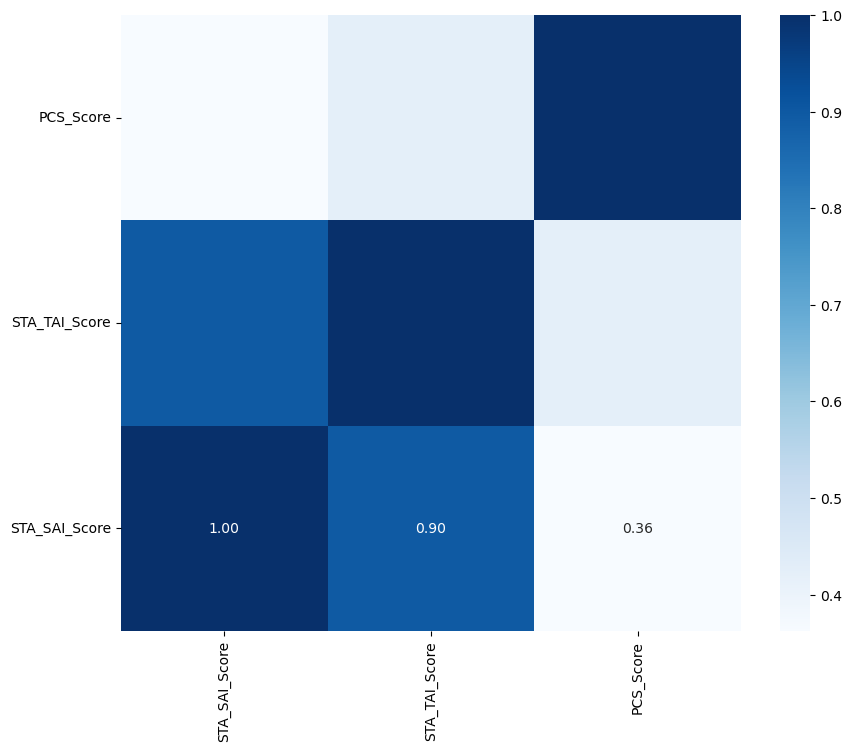

In [24]:
score_corr = score_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(score_corr, annot=True, fmt=".2f", cmap='Blues', xticklabels=True, yticklabels=True)
# invert the y-axis
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



## concatenate the 3 DataFrames (score_data (SAI, TAI, PCS), model_data (fitted sv_pain values), large beahvioural dataframe 

In [25]:
# load the beahvioural and the sv modeling data, keep in mind: score_data is the the frame which contains SAI, TAI, PCS scores
dat = pd.read_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/behavioural_sv_cleaned_2.csv')
model_data = pd.read_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/data_sv_modeling_Coll.csv')

dat.head()

score_data.reset_index(drop=True, inplace=True)
dat.reset_index(drop=True, inplace=True)

#merged_data_2 = pd.concat([dat, score_data], axis=1)
merged_data_2 = dat.merge(score_data, on='participant', how='left')

merged_data_2.head(5000)

model_data_sub = model_data[['participant',
                             'perc_accept',
                             'sv_pain_none',
                             'sv_both_none',
                             'k_pain_none',
                             'beta_none',
                             'bias_none',
                             'sv_pain_linear',
                             'sv_both_linear',
                             'k_pain_linear',
                             'beta_linear',
                             'bias_linear',
                             'sv_pain_para',
                             'sv_both_para',
                             'k_pain_para',
                             'beta_para',
                             'bias_para',
                             'sv_pain_expo',
                             'sv_both_expo',
                             'k_pain_expo',
                             'beta_expo',
                             'bias_expo',
                             'sv_pain_cubic',
                             'sv_both_cubic',
                             'k_pain_cubic',
                             'beta_cubic',
                             'bias_cubic',
                             'sv_pain_logarithmic',
                             'sv_both_logarithmic',
                             'k_pain_logarithmic',
                             'beta_logarithmic',
                             'bias_logarithmic',
                             'sv_pain_root',
                             'sv_both_root',
                             'k_pain_root',
                             'beta_root',
                             'bias_root',
                             'sv_pain_hyper',
                             'sv_both_hyper',
                             'k_pain_hyper',
                             'beta_hyper',
                             'bias_hyper']]

merged_data_2.reset_index(drop=True, inplace=True)
model_data_sub.reset_index(drop=True, inplace=True)
merged_data_3 = pd.concat([merged_data_2,model_data_sub], axis=1)
#merged_data_3 = merged_data_2.merge(model_data_sub, on='participant', how='left')

merged_data_3
merged_data_3.to_csv('D:/Aberdeen_Uni_June24/MPColl_Lab/All_Files_Relevant_For_Git/Quest_Code/Quest_Data/behavioural_sv_cleaned_final_3.csv')
merged_data_3

,Unnamed: 0,participant,painstim,moneystim,all_trials_rewards,painlevel,painlevel_J,leftstim,rightstim,acceptside,...,sv_pain_root,sv_both_root,k_pain_root,beta_root,bias_root,sv_pain_hyper,sv_both_hyper,k_pain_hyper,beta_hyper,bias_hyper
0,123,sub-004,p5,m4,NaN,5,7000.0,stimuli/m4.png,stimuli/p5.png,right,...,1.066128,-2.933872,2.459689,143.668566,143.668566,-0.011702,-4.011702,1.947683,70.660156,70.660156
1,124,sub-004,p3,m3,NaN,3,4500.0,stimuli/p3.png,stimuli/m3.png,right,...,0.825819,-2.174181,2.459689,143.668566,143.668566,-0.021205,-3.021205,1.947683,70.660156,70.660156
2,125,sub-004,p4,m3,NaN,4,5500.0,stimuli/p4.png,stimuli/m3.png,right,...,0.953574,-2.046426,2.459689,143.668566,143.668566,-0.015081,-3.015081,1.947683,70.660156,70.660156
3,126,sub-004,p2,m3,NaN,2,3500.0,stimuli/m3.png,stimuli/p2.png,right,...,0.674278,-2.325722,2.459689,143.668566,143.668566,-0.035731,-3.035731,1.947683,70.660156,70.660156
4,127,sub-004,p4,m4,NaN,4,5500.0,stimuli/m4.png,stimuli/p4.png,right,...,0.953574,-3.046426,2.459689,143.668566,143.668566,-0.015081,-4.015081,1.947683,70.660156,70.660156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,5052,sub-050,p2,m5,NaN,2,8500.0,stimuli/m5.png,stimuli/p2.png,right,...,2.218836,-0.781164,16.520447,141.950399,141.950399,-0.048966,-3.048966,1.014085,33.356715,33.356715
4684,5053,sub-050,p3,m3,NaN,3,11000.0,stimuli/m3.png,stimuli/p3.png,right,...,2.218836,1.218836,16.520447,141.950399,141.950399,-0.048966,-1.048966,1.014085,33.356715,33.356715
4685,5054,sub-050,p3,m1,NaN,3,11000.0,stimuli/m1.png,stimuli/p3.png,right,...,2.562092,1.562092,16.520447,141.950399,141.950399,-0.032719,-1.032719,1.014085,33.356715,33.356715
4686,5055,sub-050,p4,m1,NaN,4,14500.0,stimuli/p4.png,stimuli/m1.png,right,...,1.811672,-0.188328,16.520447,141.950399,141.950399,-0.097260,-2.097260,1.014085,33.356715,33.356715


# correlating some potential predictors of regression models for the bayesian analysis

painlevel                int64
moneylevel               int64
rt                     float64
STA_SAI_Score          float64
STA_TAI_Score          float64
PCS_Score              float64
sv_pain_linear         float64
sv_pain_para           float64
sv_pain_expo           float64
sv_pain_cubic          float64
sv_pain_logarithmic    float64
sv_pain_root           float64
sv_pain_hyper          float64
sv_both_linear         float64
sv_both_para           float64
sv_both_expo           float64
sv_both_cubic          float64
sv_both_logarithmic    float64
sv_both_root           float64
sv_both_hyper          float64
OV_value                 int32
Abs_value                int32
OV_Money_Pain            int32
Abs_Money_Pain           int32
acceptance_pair          int32
dtype: object


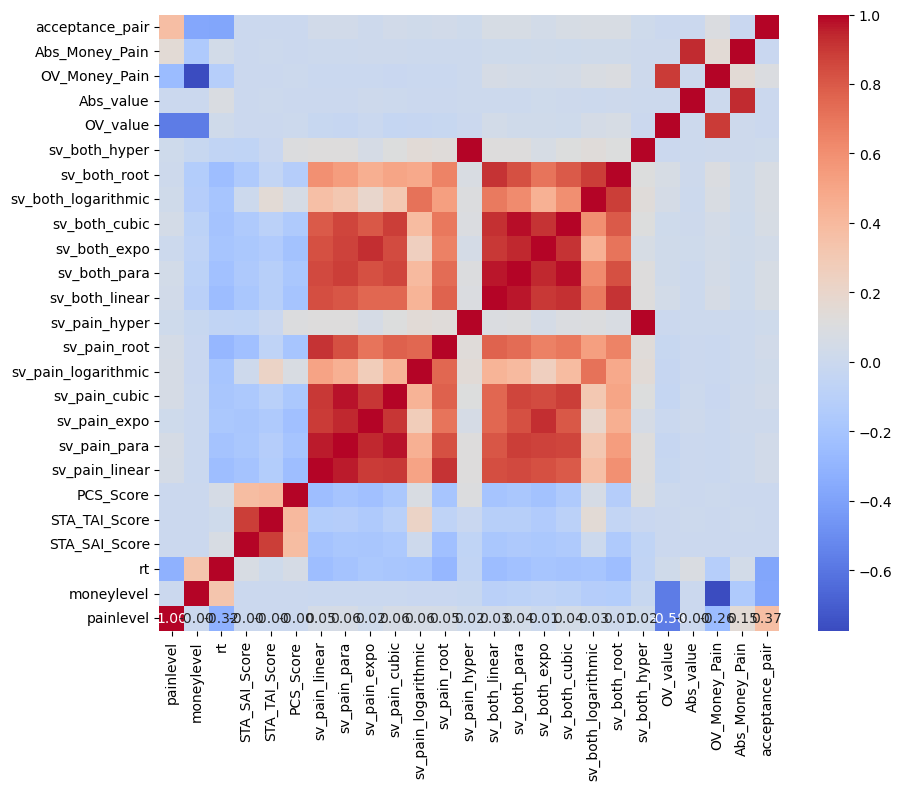

<Figure size 640x480 with 0 Axes>

In [27]:

# use LabelEncoder for converting categorical columns into numerical ones
from sklearn.preprocessing import LabelEncoder

merged_data_3 = merged_data_3.dropna(subset=['STA_SAI_Score', 'STA_TAI_Score', 'PCS_Score'])

corr_sub = merged_data_3[['painlevel',
                   'moneylevel',
                   'rt',
                   'STA_SAI_Score',
                   'STA_TAI_Score',
                   'PCS_Score', 
                   'sv_pain_linear',
                   'sv_pain_para',
                   'sv_pain_expo',
                   'sv_pain_cubic',
                   'sv_pain_logarithmic',
                   'sv_pain_root',
                   'sv_pain_hyper', 
                   'sv_both_linear',
                   'sv_both_para',
                   'sv_both_expo',
                   'sv_both_cubic', 
                   'sv_both_logarithmic',
                   'sv_both_root', 
                   'sv_both_hyper', 
                   'OV_value',
                   'Abs_value', 
                   'OV_Money_Pain',
                   'Abs_Money_Pain',
                   'acceptance_pair'
]]
corr_sub = corr_sub.dropna()

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values
categorical_columns = ['OV_value', 'Abs_value', 'OV_Money_Pain', 'Abs_Money_Pain', 'acceptance_pair']
for col in categorical_columns:
    corr_sub[col] = le.fit_transform(corr_sub[col].astype(str))

numeric_columns = ['painlevel',
                   'moneylevel',
                   'rt',
                   'STA_SAI_Score',
                   'STA_TAI_Score',
                   'PCS_Score', 
                   'sv_pain_linear',
                   'sv_pain_para',
                   'sv_pain_expo',
                   'sv_pain_cubic',
                   'sv_pain_logarithmic',
                   'sv_pain_root',
                   'sv_pain_hyper', 
                   'sv_both_linear',
                   'sv_both_para',
                   'sv_both_expo',
                   'sv_both_cubic', 
                   'sv_both_logarithmic',
                   'sv_both_root', 
                   'sv_both_hyper', 
                   'OV_value',
                   'Abs_value', 
                   'OV_Money_Pain',
                   'Abs_Money_Pain',
                   'acceptance_pair'
]

# Convert specified columns to numeric
for col in numeric_columns:
    corr_sub[col] = pd.to_numeric(corr_sub[col], errors='coerce')

print(corr_sub.dtypes)

# # Convert columns to numeric
# for col in corr_sub.columns:
#     corr_sub[col] = pd.to_numeric(corr_sub[col], errors='coerce')

score_corr = corr_sub.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(score_corr, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=True, yticklabels=True)
# Invert the y-axis
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
plt.savefig('Quest_sv_pain_Corr.png')